In [1]:
using Agents
using Random
using InteractiveDynamics
using CairoMakie

@agent tcell ContinuousAgent{2} begin
    activation_status::Float64
    has_been_activated::Bool
    time_after_activation::Int
    is_currently_activated::Bool
end

@agent dcell ContinuousAgent{2} begin
    activation_status::Float64
    time_after_activation::Int
    is_currently_activated::Bool
    neighbor_tcell_id::Int
end

In [24]:
cells = Union{tcell, dcell}

function initialize_model(; 
    n_dcell = 20, 
    n_tcell = 30, 
    speed = 5,
    extent = (900,900),    
    visual_distance = 5.0,
    activation_status = 0.0,
    has_been_activated = false,
    time_after_activation = 0, 
    is_currently_activated = false,
    neighbor_tcell_id = 0,
    )

    space2d = ContinuousSpace(extent; spacing = 10,)
    
    model = ABM(cells, space2d ,rng = MersenneTwister(30),properties = Dict(:dt => 1.0); 
        scheduler = Schedulers.randomly)

    #scale the random number
    
    for _ in 1:n_tcell
        pos = Tuple(rand(model.rng, 2)).*300
        vel = sincos(2π * rand(model.rng)) .* speed 
        add_agent!(
            pos, tcell, model , vel, activation_status, has_been_activated, time_after_activation, is_currently_activated
        )
    end
    
    for _ in 1:n_dcell
        pos = Tuple(rand(model.rng, 2)).*300
        vel = sincos(2π * rand(model.rng)) .* speed .* 0.6
        add_agent!(
            pos, dcell, model, vel, activation_status, time_after_activation, is_currently_activated, neighbor_tcell_id
        )
    end
    
    print(rand(model.rng))
    print("\n")
    


    return model
end

initialize_model (generic function with 1 method)

In [25]:
function control_velocity(temp; speed = 5)
    if temp.time_after_activation < 1440 && temp.time_after_activation != 0
        temp.vel = (0,0)
        
    elseif temp.time_after_activation >= 1440 || temp.time_after_activation == 0
        if temp isa dcell
            temp.vel = sincos(2π * rand(model.rng)) .* speed .* 0.6  #random walk movement
        else
            temp.vel = sincos(2π * rand(model.rng)) .* speed  
        end
    end
end
    

control_velocity (generic function with 1 method)

In [26]:
model = initialize_model()

#1 time step = 1 minute
# T cell - D cell interaction lasts for 1440 time step
function agent_step!(cells, model; speed = 5, )
    
    if cells isa dcell #d cell case
        neighbor_ids = nearby_ids(cells,model,5)  # set boundary for neighbor as 5
        
        if cells.neighbor_tcell_id == 0
            
            for id in neighbor_ids
            neighbor = model[id]

            if neighbor isa tcell && neighbor.has_been_activated == false
                cells.neighbor_tcell_id = id
                cells.time_after_activation += 1
                neighbor.time_after_activation += 1
                
                cells.vel = (0,0)
                neighbor.vel = (0,0)
                break
                   
            end
                
         else
            for id in neighbor_ids
                if id == cells.neighbor_tcell_id
                    neighbor = model[id]
                    cells.time_after_activation += 1
                    neighbor.time_after_activation += 1
                    cells.vel = (0,0)
                    neighbor.vel = (0,0)
                    break
                end 
            end
             
        end 
                     
    end
           
    
#     else  #t cell case
#         control_velocity(cells)
# #         cells.vel = sincos(2π * rand(model.rng)) .* speed #random walk movement
#         neighbor_ids = nearby_ids(cells,model,5)
        
#         if cells.activation_status >= 3
#                 cells.is_currently_activated = true
#         else
#             cells.is_currently_activated = false    
#         end
        
# #         if cells.id ==1
# #             print(cells.activation_status)
# #             print('\n')
# #         end
        
#         for id in neighbor_ids
#             neighbor = model[id]   
                
#             cells.time_after_activation = 0
#             control_velocity(cells)
            
#             if neighbor isa dcell && cells.has_been_activated == false
#                    cells.has_been_activated = true
#                    cells.activation_status += 1/240
#                    cells.time_after_activation = 1
#                    control_velocity(cells)
#                    break

#             elseif cells.has_been_activated == true &&cells.time_after_activation< 1440
#                     cells.activation_status += 1/240
#                     cells.time_after_activation += 1
#                     control_velocity(cells)
#                     break
                 
#             cells.activation_status -= 1/60
#             cells.time_after_activation += 1
#             control_velocity(cells)
            
#             end    
#         end
#     end
    
    move_agent!(cells, model, model.dt)
end
CairoMakie.activate!()

0.45559996131514


┌ Warning: AgentType is not concrete. If your agent is parametrically typed, you're probably
│ seeing this warning because you gave `Agent` instead of `Agent{Float64}`
│ (for example) to this function. You can also create an instance of your agent
│ and pass it to this function. If you want to use `Union` types for mixed agent
│ models, you can silence this warning.
└ @ Agents ~/.julia/packages/Agents/9UdZV/src/core/model.jl:299


LoadError: syntax: "for" at In[26]:12 expected "end", got "else"

In [16]:
istcell(a) = a isa tcell
isdcell(a) = a isa dcell
iscurrently_activated(a) = a.is_currently_activated == true

steps = 100000
adata = [(istcell,count),(isdcell,count), (iscurrently_activated, count)]
adf, mdf= run!(model, agent_step!, steps; adata)


24
17
23
30
30
13
40
11
12
12
29
13
1
14
13
13
25
25
30
11
37
11
2
11
33
18
39
13
30
13
30
13
30
12
12
20
30
46
46
24
24
12
30
29
29
29
29
39
39
37
37
39
39
37
37
11
39
39
37
39
39
39
17
17
5
5
5
8
17
18
45
8
8
45
4
12
22
22
22
22
22
22
25
20
20
12
12
17
44
35
35
35
4
4
5
5
16
16
3
27
27
19
19
29
29
17
47
34
47
31
31
33
34
31
10
1
11
11
1
31
36
40
40
22
24
24
24
35
47
41
39
41
8
7
7
8
1
31
49
49
20
16
14
27
27
27
27
27
27
27
2
2
2
10
10
10
48
46
48
46
10
48
48
18
18
18
5
38
14
16
38
43
48
44
9
28
13
13
14
10
32
45
32
20
45
32
45
45
32
20
8
34
11
20
20
15
21
42
40
42
42
42
46
42
42
50
21
21
21
6
23
23
37
12
31
42
42
31
42
31
42
6
6
3
3
24
27
31
11
11
11
11
11
11
11
11
11
7
29
39
35
41
38
41
39
35
39
35
39
35
39
13
13
39
13
6
6
10
5
25
25
25
25
26
26
20
45
45
49
45
49
49
45
49
45
9
49
11
36
42
42
36
36
42
42
17
17
17
17
17
17
17
36
17
17
17
17
42
36
42
42
42
36
42
42
36
42
42
36
42
17
42
36
36
40
40
40
44
44
6
22
31
44
44
31
31
44
6
25
25
30
30
49
23
21
21
28
28
28
45
29
50
45
45
50
50
4

11
11
27
27
27
27
21
24
14
40
47
2
7
7
7
41
6
6
6
6
27
19
19
26
26
37
48
48
37
37
48
9
15
41
38
38
35
38
38
34
4
4
45
4
48
45
48
45
4
24
6
8
28
26
12
12
6
34
6
6
34
6
6
6
6
39
39
49
49
39
14
39
14
10
29
29
29
25
17
49
14
26
27
27
27
24
10
10
49
43
43
13
5
18
18
21
23
23
50
26
30
30
18
18
18
29
14
6
40
36
2
36
40
2
36
40
36
40
36
36
40
36
36
26
26
27
44
44
44
33
33
44
14
44
35
11
11
33
20
25
49
30
46
40
14
14
14
14
14
45
46
45
14
8
8
28
28
8
2
2
2
2
2
2
9
11
27
19
19
10
10
10
40
10
15
10
15
15
6
15
15
15
34
10
34
42
44
44
7
7
25
2
37
3
3
3
14
31
38
38
50
50
50
38
50
38
50
38
5
18
15
15
49
42
49
42
49
42
49
42
21
16
34
33
34
33
34
5
33
34
4
26
26
44
23
23
23
29
29
29
9
36
9
9
36
9
36
36
9
29
29
9
9
5
5
20
11
16
12
12
26
12
12
12
7
6
34
36
34
36
36
34
27
6
27
6
39
12
1
29
9
17
17
17
17
5
21
3
3
21
21
21
21
33
49
33
49
49
33
15
15
3
5
40
45
13
50
45
13
50
45
45
50
50
45
45
50
45
45
49
35
14
21
21
21
21
38
9
26
35
46
26
23
11
23
24
1
24
41
24
24
41
44
24
33
40
40
33
40
12
34
50
34
18
21
19


26
46
34
34
46
46
34
46
38
16
10
10
16
16
47
47
31
31
47
31
37
17
17
41
39
39
41
28
28
28
28
28
13
13
13
13
13
13
38
17
27
17
27
27
27
19
19
16
19
32
32
19
7
7
12
25
14
37
37
27
27
37
37
39
37
44
24
44
42
26
42
24
44
4
42
42
4
44
44
42
42
23
23
23
23
23
21
19
48
41
21
37
4
33
4
4
1
1
4
10
10
3
12
12
12
17
16
45
38
12
29
29
30
33
30
33
19
30
45
19
33
30
33
30
19
19
4
4
4
4
17
17
43
42
42
43
11
11
11
11
11
6
6
13
13
10
10
24
27
27
1
17
43
1
1
43
29
15
25
28
38
33
38
38
24
35
36
35
36
35
8
31
4
34
11
11
39
3
49
49
49
27
49
49
18
18
26
16
16
20
20
20
20
16
16
16
9
45
13
30
31
34
24
4
4
12
1
1
1
12
27
43
45
43
45
43
45
45
22
21
13
16
3
3
3
3
20
20
20
41
46
47
17
13
30
48
50
9
50
50
21
26
26
20
20
20
20
21
21
38
47
21
10
38
10
10
18
30
11
29
34
43
34
26
4
22
4
22
24
21
21
13
2
2
2
12
25
22
32
39
32
39
28
5
1
1
6
46
31
31
22
46
27
16
30
23
31
31
46
33
33
41
46
46
41
41
46
41
33
46
33
8
8
22
4
20
1
1
14
14
14
25
18
18
18
37
5
5
5
34
50
12
30
2
10
2
2
37
37
42
37
42
5
5
33
33
5
39
39
33
7
39
33

30
19
20
32
32
24
48
48
47
47
48
48
47
48
48
47
24
24
10
24
24
21
21
8
2
4
4
15
4
4
4
7
19
35
35
45
45
35
12
10
10
10
21
23
9
4
47
46
46
46
47
47
46
32
32
20
20
40
40
29
1
1
1
19
4
17
27
30
30
13
33
33
35
5
33
30
47
37
30
24
25
5
26
19
26
29
47
44
23
14
47
44
44
22
44
40
2
40
42
2
40
9
2
44
2
19
29
29
14
11
40
14
2
43
28
44
32
28
38
38
36
38
36
42
45
36
18
14
3
7
7
47
47
40
47
40
8
3
40
3
40
47
40
40
40
40
38
47
38
40
20
50
50
32
32
50
50
32
32
50
32
32
5
34
49
34
5
34
5
45
45
3
32
45
25
4
4
9
28
8
9
8
8
4
4
4
8
8
37
45
17
47
47
8
47
28
28
28
28
44
17
17
17
44
50
50
41
34
34
4
49
47
49
9
25
25
25
10
14
14
7
42
38
38
42
42
19
20
3
50
35
26
25
5
5
7
10
10
10
10
10
10
10
6
6
6
16
4
28
12
8
8
39
46
34
46
46
17
14
14
7
14
14
45
5
5
33
33
40
33
48
43
48
43
43
48
48
43
48
2
2
2
2
6
11
48
33
48
48
15
15
42
15
15
36
42
42
15
36
36
21
21
21
10
18
14
36
10
37
10
34
37
34
37
37
18
25
9
9
5
45
3
45
47
45
47
29
5
5
7
11
2
9
9
9
18
9
9
47
35
35
47
35
8
8
4
4
36
36
28
28
28
28
32
21
49
46
49
46
46
49


25
32
32
42
32
32
14
14
14
22
8
8
8
8
8
8
45
35
45
35
35
45
35
35
35
16
31
31
3
34
31
3
3
31
3
39
31
3
3
3
3
24
24
24
3
3
32
36
28
14
14
32
36
14
4
31
31
2
22
22
46
46
7
7
7
7
7
26
21
7
7
4
6
1
6
1
23
23
20
20
30
29
16
16
16
16
26
26
26
20
8
20
34
9
5
5
9
20
20
21
45
46
45
46
45
46
45
45
3
46
16
16
36
31
31
36
31
31
36
21
33
41
7
30
13
18
18
5
18
18
18
18
9
11
27
27
11
27
38
1
41
1
38
1
1
5
5
21
4
2
11
25
28
25
34
34
17
9
9
9
9
9
9
7
7
42
50
26
21
31
21
16
45
48
45
41
50
45
41
48
48
41
41
48
41
8
42
3
3
3
18
5
3
42
15
9
10
16
38
30
30
44
30
30
31
19
19
45
22
48
48
49
48
48
49
48
48
33
37
49
22
22
47
24
19
19
8
34
34
45
45
34
1
45
34
15
1
15
45
15
22
20
2
2
2
40
40
40
30
40
44
16
14
34
28
34
31
34
23
30
33
10
10
7
50
43
4
4
1
44
25
44
5
27
14
14
14
25
33
38
46
35
46
46
35
35
46
46
35
4
19
35
23
23
48
48
31
48
31
1
33
48
33
33
18
44
40
20
3
18
13
22
28
28
37
28
50
28
50
32
10
17
38
43
4
43
43
33
28
28
13
13
4
15
8
3
20
20
14
25
25
16
10
30
35
40
35
35
40
35
20
11
11
25
31
31
25
40
31
40


43
1
24
24
19
19
10
21
21
21
21
22
2
32
32
45
45
32
45
45
45
45
43
45
43
23
45
21
43
43
32
32
23
23
23
20
20
43
32
32
43
43
22
13
13
32
43
13
43
13
43
2
2
43
43
24
24
30
4
32
4
32
19
19
4
6
6
6
38
1
31
1
9
9
9
9
1
1
1
35
44
35
44
44
35
35
44
44
35
44
6
44
8
20
16
16
16
35
35
35
42
42
35
42
16
16
16
30
21
26
4
4
4
21
4
21
49
44
6
49
49
44
49
44
44
23
20
18
40
43
40
19
41
24
5
5
27
13
1
1
20
20
11
11
44
44
3
3
27
27
24
50
38
13
13
13
13
3
49
49
37
49
5
20
21
21
19
46
19
11
35
18
18
6
6
6
6
6
6
19
19
6
19
12
12
12
10
10
10
11
4
11
4
17
17
17
17
24
24
10
24
8
8
16
16
8
16
16
10
17
19
23
15
19
19
19
19
19
30
32
49
49
22
3
15
30
50
2
50
2
4
4
6
11
6
3
3
3
3
8
6
6
6
11
21
14
14
45
17
21
21
21
41
32
23
32
41
32
5
5
5
50
5
29
5
7
7
7
49
49
3
26
33
33
41
11
11
11
3
3
22
35
39
35
39
35
20
46
18
18
38
37
37
38
38
37
38
42
49
9
12
1
1
30
30
38
27
27
27
27
27
17
6
19
19
6
6
3
6
29
29
11
11
16
11
11
11
16
11
16
16
16
24
24
24
14
24
24
15
49
34
32
34
32
32
34
32
32
42
22
22
22
22
22
21
21
22
21
46
34


2
47
48
48
47
15
31
15
46
5
5
32
6
19
27
16
22
5
34
48
34
16
16
16
15
15
15
16
16
8
36
32
32
36
32
36
36
24
35
38
38
46
46
3
50
46
46
7
30
15
15
33
39
33
33
40
33
33
40
48
48
18
48
25
25
25
25
19
19
19
19
28
28
10
10
20
36
36
36
34
36
28
28
36
48
36
36
43
6
24
24
40
28
16
24
24
24
45
23
23
49
34
36
49
34
45
36
36
30
34
6
36
36
15
36
36
45
46
48
40
24
8
26
26
26
6
6
15
22
22
22
3
3
22
22
22
22
22
5
16
16
27
27
27
27
5
44
26
44
24
8
8
40
27
27
14
14
14
14
14
14
20
21
21
11
11
19
4
4
4
38
46
38
7
7
7
12
12
12
15
33
24
33
46
24
33
24
33
19
46
2
2
19
2
19
2
19
23
2
2
2
33
2
33
50
33
33
20
20
20
41
50
41
50
43
43
12
12
12
1
1
26
33
38
33
33
38
37
40
37
37
9
9
9
9
9
15
2
2
2
15
27
27
27
27
3
5
3
22
22
45
22
16
16
16
16
33
33
38
40
40
14
14
24
24
24
24
27
30
27
27
30
30
27
30
30
2
27
12
12
12
12
18
18
18
18
18
26
10
10
41
28
28
38
35
38
35
38
35
38
35
38
9
35
9
38
26
26
24
24
24
3
20
20
20
20
20
27
27
8
8
30
30
30
20
47
46
47
47
47
21
10
12
12
14
16
12
12
12
18
18
33
42
42
33
42
42
10
10
16
16

22
42
42
22
37
11
11
11
11
29
16
40
40
38
39
35
35
39
39
7
7
7
27
4
27
2
23
7
28
20
20
20
14
20
29
26
26
9
9
9
3
2
28
22
15
15
15
24
24
36
2
37
29
29
29
1
29
29
29
29
7
1
1
29
3
48
25
25
43
49
26
49
43
43
26
26
29
6
1
12
12
12
12
12
9
9
23
22
22
22
22
22
49
49
6
49
6
6
11
11
49
49
23
23
23
23
30
23
23
23
23
23
23
23
48
37
37
11
44
11
11
34
11
44
25
16
25
16
29
29
22
29
44
29
29
44
45
45
44
45
44
5
13
37
2
5
6
47
11
11
21
44
39
49
49
39
49
6
6
4
15
27
27
15
27
27
27
37
48
37
48
37
48
22
24
24
29
13
18
4
26
23
46
49
30
10
10
10
11
42
42
47
5
32
32
18
18
18
18
9
2
16
16
16
40
46
46
30
30
50
30
17
17
17
17
17
27
1
28
40
48
40
48
40
40
48
40
48
40
48
40
48
38
33
38
38
33
24
6
6
12
13
13
13
8
17
26
12
12
12
11
20
20
20
20
20
10
10
10
10
10
10
10
10
10
19
8
8
26
26
28
34
34
42
34
21
6
21
45
21
45
44
46
7
19
37
37
4
41
41
41
3
49
9
20
46
8
34
50
34
21
23
23
10
5
48
33
3
6
6
14
15
4
4
16
24
24
37
27
50
50
29
50
42
42
4
10
11
11
11
50
34
31
10
31
10
21
13
30
45
15
45
15
15
39
45
45
39
39
45
45
3

(100001×4 DataFrame
    Row │ step    count_istcell  count_isdcell  count_iscurrently_activated 
        │ Int64   Int64          Int64          Int64                       
────────┼───────────────────────────────────────────────────────────────────
      1 │      0             30             20                            0
      2 │      1             30             20                            0
      3 │      2             30             20                            0
      4 │      3             30             20                            0
      5 │      4             30             20                            0
      6 │      5             30             20                            0
      7 │      6             30             20                            0
      8 │      7             30             20                            0
      9 │      8             30             20                            0
     10 │      9             30             20                   

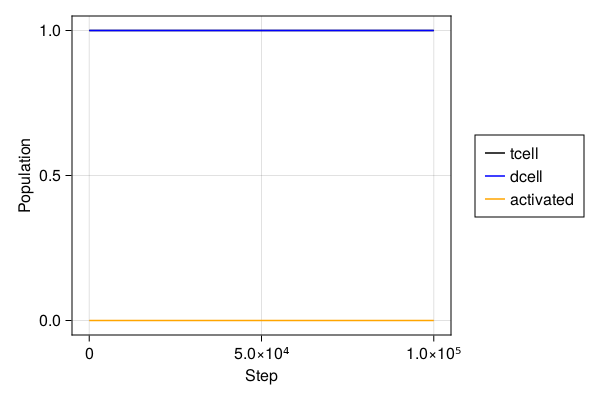

In [12]:
function plot_population(adf, mdf)
    figure = Figure(resolution = (600, 400))
    ax = figure[1, 1] = Axis(figure; xlabel = "Step", ylabel = "Population")
    tcell_l = lines!(ax, adf.step, adf.count_istcell, color = :black)
    dcell_l = lines!(ax, adf.step, adf.count_isdcell, color = :blue)
    activated_l = lines!(ax, adf.step, adf.count_iscurrently_activated, color = :orange)
    figure[1, 2] = Legend(figure, [tcell_l, dcell_l, activated_l], ["tcell","dcell","activated"])
    figure
end

plot_population(adf, mdf)
    

In [9]:
# offset(a) = a isa tcell ? (-0.1, -0.1*rand()) : (+0.1, +0.1*rand())
ashape(a) = :circle
asize(a) = a isa dcell ? 20 : 10
acolor(a) = a.activation_status > 0 ? :blue : :black
# ac(dcell) = :blue
# ac(tcell) = :black

acolor (generic function with 1 method)

In [10]:
abmvideo("tcell.mp4", model, agent_step!;
title = "immune cell", framerate  = 100, 
    frames = 2880, as=asize, am = ashape, ac = acolor)

In [ ]:
tcell dcell detach 될때 다시 값 감소 해서 색깔 바뀌는 것 구현

   